In [1]:
%ls

BankNote.ipynb*               TensorFlow - Belajar.ipynb
MNIST.ipynb                   Untitled.ipynb
MNIST_data/                   Untitled1.ipynb
TF Estimator - Belajar.ipynb  Untitled2.ipynb
TF Estimator.ipynb            bank_note_data.csv*
TF.ipynb                      iris.csv*


In [6]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bank_note_data.csv")

In [4]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


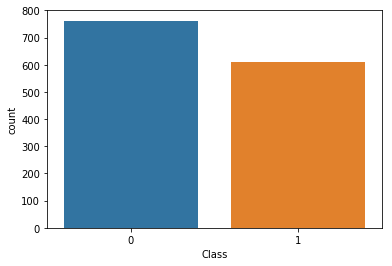

In [9]:
sns.countplot(x='Class', data=df)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaller = StandardScaler()

In [17]:
scaller.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features = scaller.fit_transform(df.drop('Class', axis=1))

In [20]:
df_feature = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [22]:
df_feature.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [23]:
X = df_feature
y = df['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
import tensorflow as tf

In [27]:
feature_col = []
for feature in X.columns:
    feature_col.append(tf.feature_column.numeric_column(feature))

In [42]:
feature_col

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:
classifier = tf.estimator.DNNClassifier
(hidden_units=[10,20,15], n_classes=2, feature_columns=feature_col)

In [31]:
input_function = tf.estimator.inputs.pandas_input_fn
(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [ ]:
classifier.train(input_fn=input_function,steps=100)

In [35]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test), shuffle=False)

In [43]:
result_prediction = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/gx/l4cmby291772nllh4y00mc600000gn/T/tmpts5w6prl/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
result_prediction[0]

{'logits': array([-7.7688355], dtype=float32),
 'logistic': array([0.00042253], dtype=float32),
 'probabilities': array([9.9957746e-01, 4.2252659e-04], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

In [38]:
final_preds  = []
for pred in result_prediction:
    final_preds.append(pred['class_ids'][0])

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       229
           1       0.99      0.94      0.96       183

   micro avg       0.97      0.97      0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412

